In [88]:
%matplotlib inline 
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import metrics
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from linregress import linearly_regress
from linregress import model_averages

In [89]:
df = pd.read_csv('data/kc_house_data.csv')

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [90]:
df.dropna(inplace=True)

In [91]:
df.replace({'NO': 0, 'YES': 1}, inplace = True)

In [92]:
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [93]:
df.replace({'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}, inplace= True)

In [94]:
df['yr_renovated'].mask(df['yr_renovated'] == 0, df['yr_built'], inplace = True)


In [95]:
# df.drop(columns = ['yr_built', 'bedrooms', 'bathrooms', 'sqft_above'], inplace = True)

In [96]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [97]:
# numeric_df = df.drop(columns = ['id', 'date', 'sqft_lot15', 'sqft_living15', 'sqft_lot'])

In [98]:
numeric_df = df

In [99]:
numeric_df.replace({'7 Average': 7, '8 Good': 8, '11 Excellent': 11, '9 Better': 9, '6 Low Average': 6, '5 Fair': 5, '10 Very Good': 10, '12 Luxury': 12, '4 Low': 4, '3 Poor': 3, '13 Mansion': 13}, inplace = True)

In [100]:
numeric_df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [101]:
numeric_df.replace({'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace = True)

In [102]:
# numeric_df.drop(columns = 'sqft_basement', inplace = True)

In [103]:
numeric_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.015183,0.007806,0.005569,-0.008255,-0.135739,0.020538,-0.001516,0.014639,-0.023334,0.008695,-0.009154,0.023832,0.023360,-0.007404,-0.004967,0.019701,0.000897,-0.141266
price,-0.015183,1.000000,0.305489,0.526155,0.706189,0.084504,0.259505,0.274212,0.396862,0.034367,0.664146,0.612014,0.049345,0.100023,-0.049502,0.306607,0.021215,0.581572,0.079402
bedrooms,0.007806,0.305489,1.000000,0.512243,0.573575,0.025460,0.180485,-0.005833,0.080577,0.020074,0.354243,0.474272,0.153229,0.163990,-0.147255,-0.005917,0.129370,0.390720,0.025217
bathrooms,0.005569,0.526155,0.512243,1.000000,0.753846,0.080362,0.505187,0.065688,0.180923,-0.130287,0.664748,0.685677,0.504841,0.534258,-0.199625,0.029930,0.222755,0.569290,0.081984
sqft_living,-0.008255,0.706189,0.573575,0.753846,1.000000,0.165336,0.359407,0.111491,0.285506,-0.062319,0.764251,0.876176,0.314220,0.338318,-0.196537,0.058394,0.239521,0.756676,0.176820
sqft_lot,-0.135739,0.084504,0.025460,0.080362,0.165336,1.000000,-0.009924,0.025982,0.077073,-0.016036,0.108950,0.174216,0.051578,0.048777,-0.129494,-0.084304,0.231638,0.145393,0.718489
floors,0.020538,0.259505,0.180485,0.505187,0.359407,-0.009924,1.000000,0.018382,0.027518,-0.261013,0.459843,0.529101,0.487052,0.499460,-0.058130,0.058190,0.129769,0.281982,-0.013571
waterfront,-0.001516,0.274212,-0.005833,0.065688,0.111491,0.025982,0.018382,1.000000,0.409773,0.016454,0.083034,0.077165,-0.024068,-0.001108,0.030391,-0.015935,-0.042324,0.090588,0.029636
view,0.014639,0.396862,0.080577,0.180923,0.285506,0.077073,0.027518,0.409773,1.000000,0.046354,0.248679,0.170726,-0.056645,-0.023260,0.086479,0.008403,-0.078500,0.277778,0.071496
condition,-0.023334,0.034367,0.020074,-0.130287,-0.062319,-0.016036,-0.261013,0.016454,0.046354,1.000000,-0.147810,-0.157958,-0.366938,-0.401191,0.001685,-0.022250,-0.105823,-0.096336,-0.005139


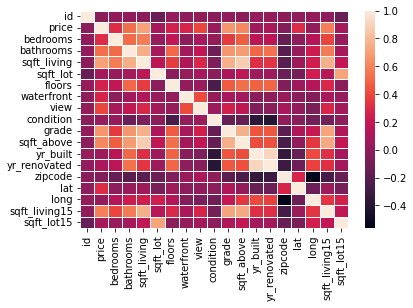

In [104]:
import seaborn as sns
sns.heatmap(numeric_df.corr(), linewidth = 0.5);

In [105]:
# from sklearn import preprocessing

# standardized_data = preprocessing.scale(numeric_df)

# df_standard = pd.DataFrame(standardized_data, columns = numeric_df.columns)

In [106]:
# import statsmodels.api as sm

# y= df_standard['price']
# X = sm.add_constant(df_standard.drop(columns = ['price', 'floors']))

# model = sm.OLS(y, X).fit()

# model.summary()

In [107]:
# def linearly_regress(y, X):
#     lr = LinearRegression()
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     lr.fit(X_train, y_train)
#     r_squared = lr.score(X_train, y_train)

#     y_pred = lr.predict(X_test)
#     MAE = mean_absolute_error(y_pred, y_test)
#     RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
    
#     return (lr, r_squared, MAE, RMSE)



In [108]:
X = numeric_df.drop(columns = ['price', 'floors', 'condition'])
y= numeric_df['price']

results = linearly_regress(y, X)
print(results)

ValueError: could not convert string to float: '7/16/2014'

Our model is trash!

In [ ]:
outlier_dropped_df = numeric_df[numeric_df['price'] < numeric_df['price'].quantile(0.95)]


In [ ]:
outlier_dropped_df.shape

(14970, 15)

In [ ]:
y= outlier_dropped_df['price']
X = outlier_dropped_df.drop(columns = ['price', 'floors', 'condition'])

results = linearly_regress(y, X)
print(results)

(LinearRegression(), 0.6900789633593631, 90966.75533543681, 120621.93220182786)


In [ ]:
log_scaled_df = numeric_df.copy()

log_scaled_df['price'] = np.log(numeric_df['price'])
log_scaled_df['sqft_living'] = np.log(numeric_df['sqft_living'])

log_scaled_df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long
1,13.195614,3,2.25,7.851661,2.0,0,0,2,7,2170,1951,1991.0,98125,47.7210,-122.319
3,13.311329,4,3.00,7.580700,1.0,0,0,4,7,1050,1965,1965.0,98136,47.5208,-122.393
4,13.142166,3,2.00,7.426549,1.0,0,0,2,8,1680,1987,1987.0,98074,47.6168,-122.045
5,14.022525,4,4.50,8.597851,1.0,0,0,2,11,3890,2001,2001.0,98053,47.6561,-122.005
6,12.458775,3,2.25,7.447168,2.0,0,0,2,7,1715,1995,1995.0,98003,47.3097,-122.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,13.071070,3,2.50,7.177782,2.0,0,0,2,8,1180,2008,2008.0,98116,47.5773,-122.409
21592,12.793859,3,2.50,7.333023,3.0,0,0,2,8,1530,2009,2009.0,98103,47.6993,-122.346
21593,12.899220,4,2.50,7.745003,2.0,0,0,2,8,2310,2014,2014.0,98146,47.5107,-122.362
21594,12.904459,2,0.75,6.927558,2.0,0,0,2,7,1020,2009,2009.0,98144,47.5944,-122.299


In [ ]:
y= log_scaled_df['price']
X = log_scaled_df.drop(columns = ['price', 'floors', 'condition'])

results = linearly_regress(y, X)
print(results)

(LinearRegression(), 0.7647206155088151, 0.1953569152334912, 0.2520592619334825)


In [ ]:
good_df = log_scaled_df[log_scaled_df['condition'] >= 2]
bad_df = log_scaled_df[log_scaled_df['condition'] < 2]


In [ ]:
y_good = good_df['price']
X_good = good_df.drop(columns = ['price', 'floors', 'condition'])

results = linearly_regress(y_good, X_good)

In [ ]:
results

(LinearRegression(),
 0.7648526235838616,
 0.19934428545861407,
 0.2607786011382795)

In [ ]:
y_bad = bad_df['price']
X_bad = bad_df.drop(columns = ['price', 'floors', 'condition'])

y_pred = results[0].predict(X_bad)

In [ ]:
y_difs = y_pred - y_bad

In [ ]:
y_difs.sort_values(ascending = False)

16879    1.150237
12294    0.997746
5522     0.990036
10573    0.911869
8716     0.736116
           ...   
4081    -0.604813
18228   -0.631243
10416   -0.721407
18861   -0.929988
8614    -0.976735
Name: price, Length: 150, dtype: float64

Lets create 100 models and get the averages over them for a more accurate result

In [ ]:
results = model_averages(y_good, X_good, y_bad, X_bad, 100)

results_df = results[0]
print(results[1])

0.19794655841526468


/Users/markhurtado/Documents/Flatiron/dsc-phase-2-project-v2-3/linregress.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  results_df[str(count)] = model[0].predict(X_predict)


In [ ]:
results_df['price'] = np.exp(results_df['price'])
results_df['averages'] = np.exp(results_df['averages'])

In [ ]:
results_difs = results_df['averages'] - results_df['price']

In [ ]:
final_df = numeric_df[numeric_df['condition'] < 2].copy()

In [ ]:
final_df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long
36,550000.0,4,1.0,1660,1.0,0,0,0,5,930,1933,1933.0,98052,47.6621,-122.132
38,240000.0,4,1.0,1220,1.0,0,0,1,7,890,1969,1969.0,98001,47.3341,-122.282
242,455000.0,2,1.0,1430,1.5,0,0,1,7,1430,1925,1925.0,98115,47.6727,-122.299
328,186375.0,3,1.0,1000,1.0,0,0,1,7,1000,1952,1952.0,98166,47.4720,-122.344
380,270000.0,2,1.5,1380,1.0,0,0,0,6,1380,1954,1954.0,98011,47.7461,-122.195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19219,200000.0,3,1.0,960,1.0,0,0,1,6,960,1933,1933.0,98024,47.5621,-121.862
19284,174900.0,3,1.0,1100,1.5,0,0,1,6,1100,1926,1926.0,98108,47.5279,-122.318
19348,290000.0,4,2.5,2340,2.0,0,0,1,8,2340,1978,1978.0,98042,47.3468,-122.091
19433,450000.0,3,1.0,1350,1.0,0,0,1,6,1200,1946,1946.0,98055,47.4657,-122.198


In [ ]:
results_difs

36      -228466.227635
38        -7464.296068
242       20177.314492
328       74429.093448
380      157908.987906
             ...      
19219     77257.169971
19284    109585.107001
19348    103195.323794
19433   -182202.221691
19496     12983.817983
Length: 150, dtype: float64

In [ ]:
final_df['pred_price'] = results_difs
final_df['estimated_cost'] = final_df['sqft_living'] * 60


In [ ]:
final_df['estimated_profit'] = final_df['pred_price'] - final_df['estimated_cost']

In [ ]:
final_df.sort_values('estimated_profit', ascending = False)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,pred_price,estimated_cost,estimated_profit
12294,196000.0,3,2.25,1510,1.0,0,0,0,7,1090,1966,1966.0,98028,47.7758,-122.238,329845.856816,90600,2.392459e+05
16879,125000.0,3,1.00,1230,1.5,0,0,0,6,1230,1916,1916.0,98117,47.6941,-122.365,264185.393398,73800,1.903854e+05
5522,119500.0,3,1.00,1170,1.0,0,0,1,6,1170,1980,1980.0,98019,47.7346,-121.983,199378.528594,70200,1.291785e+05
9751,260000.0,3,1.50,1270,1.0,0,0,1,7,1150,1948,1948.0,98155,47.7576,-122.296,192719.865140,76200,1.165199e+05
11784,170000.0,2,1.00,1200,2.0,0,0,1,7,1200,1976,1976.0,98053,47.6337,-121.961,168770.112679,72000,9.677011e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,740000.0,3,1.75,1380,1.0,0,0,1,7,930,1950,1950.0,98115,47.6841,-122.293,-302870.441815,82800,-3.856704e+05
1600,800000.0,4,2.25,2350,1.0,0,1,1,7,1510,1952,1952.0,98040,47.5743,-122.238,-272379.372988,141000,-4.133794e+05
6622,850000.0,4,2.75,5440,1.0,0,0,1,9,2720,1969,1969.0,98001,47.3540,-122.293,-127302.985121,326400,-4.537030e+05
10416,1200000.0,3,2.00,2480,1.0,0,0,1,7,2480,1955,1955.0,98052,47.6759,-122.114,-611685.966066,148800,-7.604860e+05


In [ ]:
len(final_df.loc[final_df['estimated_profit'] > 0])

52

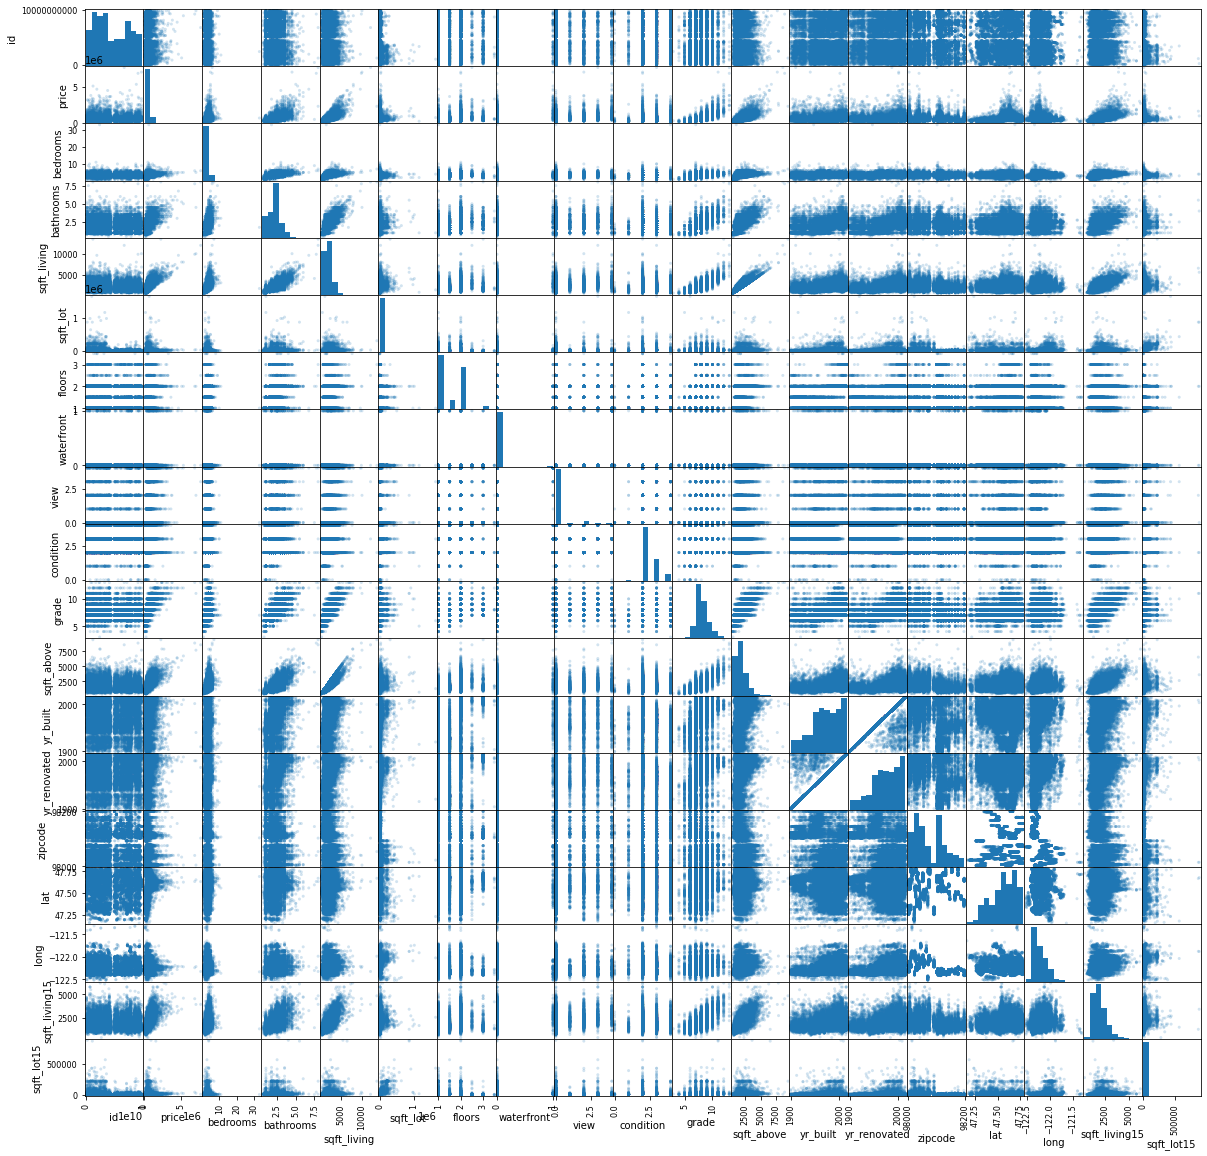

In [114]:
# numeric_df

pd.plotting.scatter_matrix(numeric_df, alpha=0.2, figsize = (20,20));